# MSDS 430 Milestone 1

<p style="font-family: Arial; font-size:1.5em;color:black; font-style:bold">
     Project Group 1: Hemant Patel, Alexander Gil, Ayush Chadha
</p>

#### Complete the following step by step instructions and submit your notebook and data file to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=green> In this first milestone we will begin working toward the final project for this course. You should begin by finding a data set that contains data you find interesting. You can find some inspiration and data sets on Kaggle.com or through the university library. Keep in mind that you cannot duplicate what's been done on Kaggle (or anywhere else) for your own project, but you can choose your data set from there or at least get ideas. You will need to also import numpy, matplotlib, and pandas at the very least for this assignment. Feel free to import any other libraries you find necessary.  </font>

Step 1 (5 pts.): Explain your plans for the final project.

<font color=green>As part of our final project, we would like to create a classification model to predict if the end customer will default his loan or not. We would be using independent variables like loan amount, deliquent history, account term lengths to predict how likely is there a chance for loan default to happen.For the purpose of this project we would be using Kaggle's lending club's (reference link below) data.<br/><br/>

We’ll build ensemble models to achieve our result using two different models as base learners: <br/>
-Gradient Boosting <br/>
-Random Forest  <br/><br/>

We would use Python libraries such as pandas, matplotlib, numpy, seaborn and sklearn to achieve our results. <br/><br/>

**Data Source References** <br/>
1.Lending Club loan data - [https://www.kaggle.com/wendykan/lending-club-loan-data]</font>

Step 2 (5 pts.): Read in your data file and use pandas to inspect the first 5 lines and the last 5 lines.

In [13]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import seaborn as sns  # pretty plotting, including heat map
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
loan_input = pd.read_csv('loan.csv',low_memory=False) #Read the loan dataset downladed from Kaggle

In [3]:
df_loandata = loan_input.copy() #Create the data frame from the input file.

In [4]:
df_loandata.head() # Printing the First 5 rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_loandata.tail() # Printing the last 5 rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260664,NaN,NaN,12000,12000,12000.0,60 months,25.82,358.01,E,E4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260665,NaN,NaN,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260666,NaN,NaN,12000,12000,12000.0,60 months,21.45,327.69,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260667,NaN,NaN,16550,16550,16550.0,60 months,21.45,451.94,D,D5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


Step 3 (5 pts.): Use numpy to perform a few calculations relevant to your goals for the final project. Explain each calculation by including comments within your code.

In [8]:
#let's explore some variables
mean_loan_amnt = int(df_loandata['loan_amnt'].mean(),)    #Mean of loan requested
mean_funded_amnt = int(df_loandata['funded_amnt'].mean())    #Mean of Funded amount
#Seems like the mean of requested and funded are not equal

mean_annual_inc = int(df_loandata['annual_inc'].mean())    #Mean of Annual income
mean_int_rate = round(df_loandata['int_rate'].mean(),3)     #Mean of Interest rates

print(f'The mean loans requested is {mean_loan_amnt}')
print(f'The mean loans funded is {mean_funded_amnt}')
print(f'The mean annual income is {mean_annual_inc}')
print(f'The mean interest rates is {mean_int_rate}%')

std_loan_amnt = int(df_loandata['loan_amnt'].std())    #std dev of loan amount
std_funded_amnt = int(df_loandata['funded_amnt'].std())    #std dev of Funded amount
std_annual_inc = int(df_loandata['annual_inc'].std())    #std dev of Annual income
std_int_rate = round(df_loandata['int_rate'].std(),3)     #std dev of Interest rates

print('--------------------------------------------------------')

print(f'The standard deviations of loans requested is {std_loan_amnt}')
print(f'The standard deviations of loans funded is {std_funded_amnt}')
print(f'The standard deviations of annual income is {std_annual_inc}')
print(f'The standard deviations of interest rates is {std_int_rate}%')

The mean loans requested is 15046
The mean loans funded is 15041
The mean annual income is 77992
The mean interest rates is 13.093%
--------------------------------------------------------
The standard deviations of loans requested is 9190
The standard deviations of loans funded is 9188
The standard deviations of annual income is 112696
The standard deviations of interest rates is 4.832%


In [10]:
#Exploring if all loans are funded fully
if round(sum(df_loandata['funded_amnt'])/sum(df_loandata['loan_amnt']),5) * 100 == 100:    #Seeing if all the loans are fully funded
    print('All loans are fully funded')
else:
    print('There are loans not fully funded')

There are loans not fully funded


In [11]:
df_loandata['loan_status'].value_counts(normalize=True)    #Get a relative count of the categories of the loan Status

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

Step 4 (5 pts.): Use matplotlib to create a visual display relevant to your goals for the final project. Explain your graph by including comments within your code.

In [12]:
df_loandata.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
id                                            0 non-null float64
member_id                                     0 non-null float64
loan_amnt                                     2260668 non-null int64
funded_amnt                                   2260668 non-null int64
funded_amnt_inv                               2260668 non-null float64
term                                          2260668 non-null object
int_rate                                      2260668 non-null float64
installment                                   2260668 non-null float64
grade                                         2260668 non-null object
sub_grade                                     2260668 non-null object
emp_title                                     2093699 non-null object
emp_length                                    2113761 non-null object
home_ownership                                2260668 n

In [15]:
# Extract sample portion of data due to size and limited computing power --> 50% extracted without replacement
sample_loan_data = df_loandata.sample(frac=0.5, random_state=1)
print('\nNumber of Records Sampled & Number of Total Columns:', sample_loan_data.shape)


Number of Records Sampled & Number of Total Columns: (1130334, 145)


In [16]:
# Examine summary statistics of sample extracted data
print('\nSummary Statistics For Sample Data')
print(sample_loan_data[['annual_inc', 'loan_amnt']].describe())

# Create bounds on each end --> exclude some outlier observations in order to minimize noisy data
sample_loan_data = sample_loan_data[(sample_loan_data['annual_inc'] > 0) & 
                                    (sample_loan_data['annual_inc'] < 61000000)]

# Examine summary statistics for cleansed data
print('\nSummary Statistics For Cleansed Sample Data')
print(sample_loan_data[['annual_inc', 'loan_amnt']].describe())

# Create another subset of data --> only include observations where Annual Income is less than or equal to $200,000
sample_loan_data_1M = sample_loan_data[(sample_loan_data['annual_inc'] <= 200000)]

# Examine summary statistics for observations where Annual Income is <= $200,000
print('\nSummary Statistics For Cleansed Sample Data Where Annual Income <= $200,000')
print(sample_loan_data_1M[['annual_inc', 'loan_amnt']].describe())


Summary Statistics For Sample Data
         annual_inc     loan_amnt
count  1.130331e+06  1.130334e+06
mean   7.809431e+04  1.506565e+04
std    9.666953e+04  9.199457e+03
min    0.000000e+00  5.000000e+02
25%    4.600000e+04  8.000000e+03
50%    6.500000e+04  1.300000e+04
75%    9.300000e+04  2.000000e+04
max    6.100000e+07  4.000000e+04

Summary Statistics For Cleansed Sample Data
         annual_inc     loan_amnt
count  1.129476e+06  1.129476e+06
mean   7.809942e+04  1.506225e+04
std    7.785525e+04  9.196982e+03
min    1.000000e+00  5.000000e+02
25%    4.600000e+04  8.000000e+03
50%    6.500000e+04  1.300000e+04
75%    9.300000e+04  2.000000e+04
max    1.099920e+07  4.000000e+04

Summary Statistics For Cleansed Sample Data Where Annual Income <= $200,000
         annual_inc     loan_amnt
count  1.102691e+06  1.102691e+06
mean   7.212970e+04  1.479955e+04
std    3.594042e+04  9.015509e+03
min    1.000000e+00  5.000000e+02
25%    4.560000e+04  8.000000e+03
50%    6.500000e+04  1.250

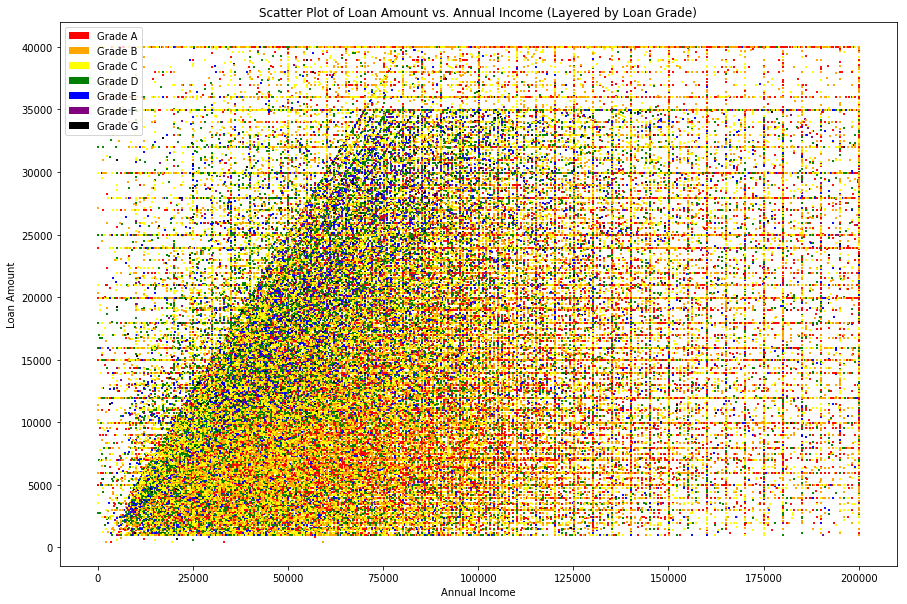

In [17]:
# At a high-level we are examining the relationship between 'Loan Amount' and 'Annual Income' which is then 
# categorized by the 'Loan Grade'. Intuitively, we would expect to see individuals who have higher income thresholds
# not having the need to take out a loan. In the scatter plot below we can see our intuition is confirmed as there
# are less observations requesting loans at higher income thresholds. There is also a positive linear correlation
# for loans graded as D and E between annual incomes of $25,000 to $75,000.

# Define variables
x = sample_loan_data_1M['annual_inc']
y = sample_loan_data_1M['loan_amnt']
z = sample_loan_data_1M['grade']

# Create space for plot figure
plt.figure(1, figsize=(15, 10))

# Create color palette for loan grade
colors = {'A':'red', 'B':'orange', 'C':'yellow', 'D':'green', 'E':'blue', 'F':'purple', 'G':'black'}

# Create scatter plot using defined variables and corresponding color palette for loan grades
plt.scatter(x, y, s=1, marker='s', c=z.apply(lambda x: colors[x]))
plt.title('Scatter Plot of Loan Amount vs. Annual Income (Layered by Loan Grade)')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
key_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black']
key_texts = ['Grade A', 'Grade B', 'Grade C', 'Grade D', 'Grade E', 'Grade F', 'Grade G']
key_patch = [mpatches.Circle((0.5, 0.5), radius = 0.25, facecolor=key_colors[i], edgecolor='none') for i in range(len(key_texts))]
plt.legend(key_patch, key_texts, loc='upper left', ncol=1)
plt.show()